In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5

In [2]:
def scan_hdf5(path, recursive=True, tab_step=2):
    def scan_node(g, tabs=0):
        print(' ' * tabs, g.name)
        for k, v in g.items():
            if isinstance(v, h5.Dataset):
                print(' ' * tabs + ' ' * tab_step + ' -', v.name)
            elif isinstance(v, h5.Group) and recursive:
                scan_node(v, tabs=tabs + tab_step)
    with h5.File(path, 'r') as f:
        scan_node(f)


def read_and_scan(filename):
    scan_hdf5(filename)
    h5_file = h5.File(filename)
    return h5_file


def current_frequency_amplitude(h5_block):
    
    current_axes = np.asarray(h5_block['entry']['data0']['current'])
    frequency_axes = np.asarray(h5_block['entry']['data0']['frequency'])
    amplitudes = np.asarray(h5_block['entry']['data0']['amplitude'])
    
    return current_axes, frequency_axes, amplitudes


def current_frequency_mesh(current_axes,frequency_axes):
    current_mesh, frequency_mesh = np.meshgrid(current_axes, frequency_axes)
    return current_mesh, frequency_mesh


def contour_plot(current, frequency, amplitude,maximum_y = 14.5):
    params = {'mathtext.default': 'regular' }          
    plt.rcParams.update(params)

    plt.contourf(current,frequency/1e9, amplitude.T, 1000, cmap = plt.get_cmap('magma_r'))

    cbar = plt.colorbar( format = '%.1f')
    cbar.set_label("$S_{11}$ (Normalised Amplitude)")
    plt.xlabel('Current /A')
    plt.ylabel('Frequency /GHz')
    plt.ylim(ymax=maximum_y)


def main(filename):
    h5_file = read_and_scan(filename)
    current, frequency, amplitude = current_frequency_amplitude(h5_file)
    return current, frequency, amplitude
    current, frequency = current_frequency_mesh(current, frequency)
    contour_plot(current, frequency, amplitude)

In [3]:
sample_filename = ("3 to 15GHz, -4.1A to 4.1A, sample face down.h5")
non_sample_filename = ('3 to 15GHz, -4.1A to 4.1A, sample face up.h5')


 /
   /entry
     /entry/analysis0
     /entry/data0
       - /entry/data0/amplitude
       - /entry/data0/amplitude_ts
       - /entry/data0/current
       - /entry/data0/frequency
       - /entry/data0/measurement
       - /entry/data0/phase
       - /entry/data0/phase_ts
       - /entry/data0/settings
     /entry/views
 /
   /entry
     /entry/analysis0
     /entry/data0
       - /entry/data0/amplitude
       - /entry/data0/amplitude_ts
       - /entry/data0/current
       - /entry/data0/frequency
       - /entry/data0/measurement
       - /entry/data0/phase
       - /entry/data0/phase_ts
       - /entry/data0/settings
     /entry/views


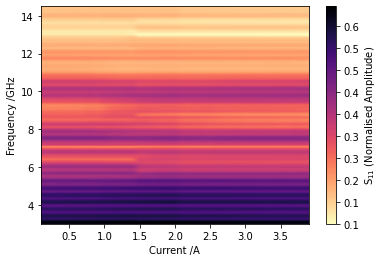

In [15]:
current, frequency, sample_amplitude = main(sample_filename)
_x, _y, bg_amplitude = main(non_sample_filename)

foreground_amplitude = sample_amplitude - bg_amplitude

contour_plot(current, frequency, bg_amplitude)

In [10]:
np.min(current)

0.1